___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://victordibia.com/static/6338df5e676209c13b77a63b24def190/faddd/denoise.jpg" width="350px" height="180px" />

# <font color= #8A0829> Denoising </font>
#### <font color= #2E9AFE> `
- <Strong> Deep Learning  </Strong>
- <Strong> Angel Gerardo De la Mora Wolburg </Strong>
- <Strong> Año </Strong>: 2024
- <Strong> Email: </Strong>  <font color="blue"> `angel.delamora@iteso.mx` </font>
___

## Objetivo

Se espera obtener un modelo de denoising  efectivo que pueda eliminar de manera precisa y eficiente el ruido presente en imágenes (el cual será generado de forma artificial y eliminado de forma artificial) de retinas, mejorando así su calidad visual y su utilidad en el diagnóstico médico. Además, se espera desarrollar una aplicación práctica y fácil de usar que pueda integrarse en entornos clínicos para mejorar la atención médica oftalmológica.

In [3]:
pip install medmnist

In [5]:
#Importar libreris a utilizar
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt

In [6]:
#Acceder a los datos
%cd /content/drive/MyDrive/Colab Notebooks/Deep_learning/Proyecto_1
%ls

/content/drive/MyDrive/Colab Notebooks/Deep_learning/Proyecto_1
Proyect_1.ipynb  retinamnist_128.npz  retinamnist.npz


In [7]:
#Importar datos
RetinaMNIST = np.load("retinamnist.npz")
print(RetinaMNIST)

NpzFile 'retinamnist.npz' with keys: train_images, val_images, test_images, train_labels, val_labels...


In [8]:
#Ver la division de nuestros datos
print(list(RetinaMNIST.keys()))


['train_images', 'val_images', 'test_images', 'train_labels', 'val_labels', 'test_labels']


In [9]:
#Se organizan los datos en en conjuntos de entrenamiento, validación y prueba.

train_images = RetinaMNIST['train_images']
train_labels = RetinaMNIST['train_labels'].squeeze()

val_images = RetinaMNIST['val_images']
val_labels = RetinaMNIST['val_labels'].squeeze()

test_images = RetinaMNIST['test_images']
test_labels = RetinaMNIST['test_labels'].squeeze()

#Asi mismo se utilizo la funcion squeeze con el objetivo de eliminar las dimensiones de tamaño 1 y así obtener un arreglo unidimensional de etiquetas.

In [10]:
# Visualizamos la dimensión de nuestros datos de entrenamiento y labels
print(train_images.shape)
print(train_labels.shape)

(1080, 28, 28, 3)
(1080,)


In [11]:
# Visualizamos la dimensión de nuestros datos de velidacion y labels
print(val_images.shape)
print(val_labels.shape)

(120, 28, 28, 3)
(120,)


In [12]:
# Visualizamos la dimensión de nuestros datos de prueba y labels
print(test_images.shape)
print(test_labels.shape)

(400, 28, 28, 3)
(400,)


Como pudimos observar anteriormente que nuestros 3 sets de datos tienen diferente cantidad de imágenes pero las imágenes tienen el mismo tamaño de 28x28 y cada una de 3 canales (RGB)

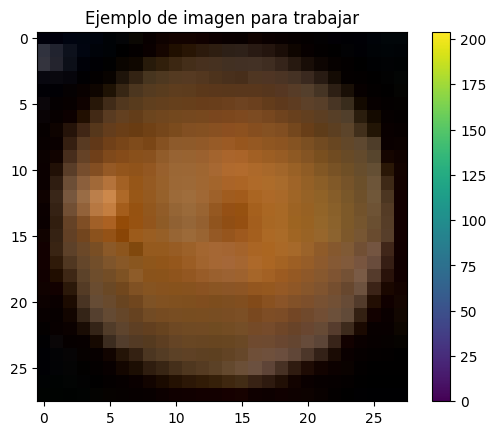

In [13]:
# Visualicemos una muestra de las imagenes con las que se van a trabajar
plt.figure()
plt.imshow(train_images[100])
plt.title ("Ejemplo de imagen para trabajar")
plt.colorbar()
plt.grid(False)
plt.show()

A continuación se realiza una normalización de las imágenes con el objetivo de asegurar que todas las características tengan un impacto similar en el modelo durante el entrenamiento, lo que puede conducir a una mejor convergencia y rendimiento del modelo.

In [14]:
# Normaliando
train_images = train_images / 255.0
test_images = test_images / 255.0
val_images = val_images / 255.0

In [15]:
#Dimension de los datos de entrenamiento
train_images.shape

(1080, 28, 28, 3)

Ejemplo de las diferentes retinas que serán ensuciadas y posteriormente limpiadas.

Desafortunadamente para esta etapa no podemos saber a qué etiqueta exacta pertenece cada una de nuestras imágenes, esto debido a que las imágenes se usaron para una regresión ordinal esto quiere decir que no contamos con las etiquetas asignadas, solo podemos saber que hay 5 tipos de imágenes, pero estas están etiquetadas por números únicamente como se observa a continuación.




In [16]:
unique_classes = np.unique(train_labels)
print("Clases disponibles en el conjunto de entrenamiento:", unique_classes)

Clases disponibles en el conjunto de entrenamiento: [0 1 2 3 4]


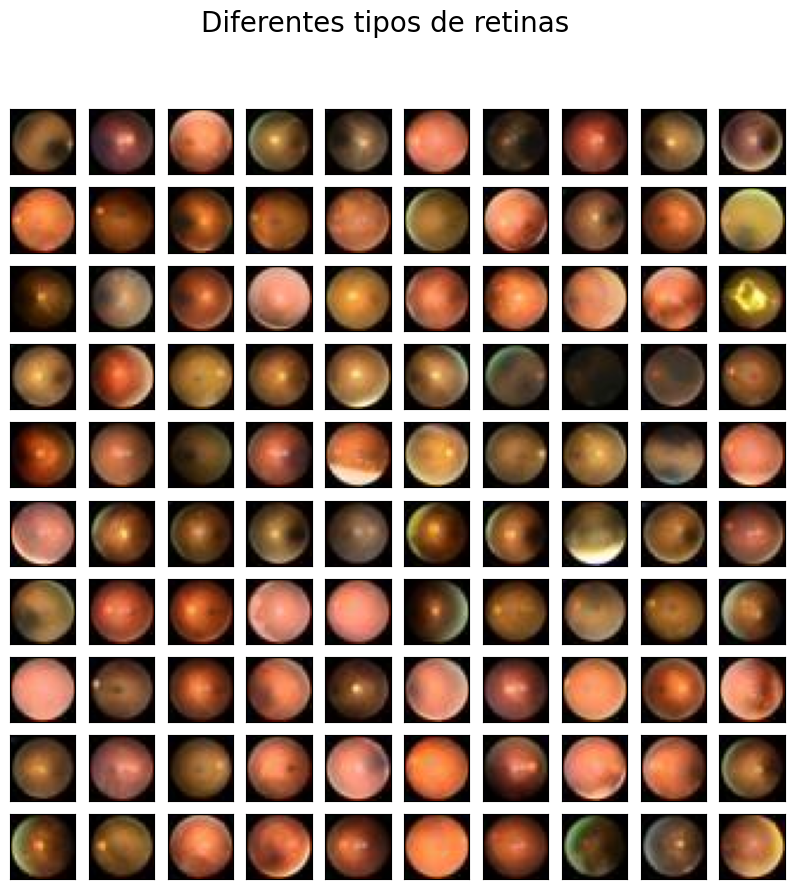

In [17]:
plt.figure(figsize=(10,10))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
plt.suptitle("Diferentes tipos de retinas", fontsize=20)
plt.show()

Ahora llego el momento de ensuciar nuestras imágenes, para este proceso contaremos con la librería de skimage y usaremos el tipo de ruido "speckle", el cual fue elegido debido a que imita las características de interferencia que pueden aparecer en imágenes de retinas debido a las propiedades del tejido ocular.

In [18]:
# Proceso de ensuciar las imágenes
import skimage.util as skutil
noisy_train_image = skutil.random_noise(train_images, mode='speckle', seed=None, clip=True)
noisy_test_image = skutil.random_noise(test_images, mode='speckle', seed=None, clip=True)
noisy_val_image = skutil.random_noise(val_images, mode='speckle', seed=None, clip=True)

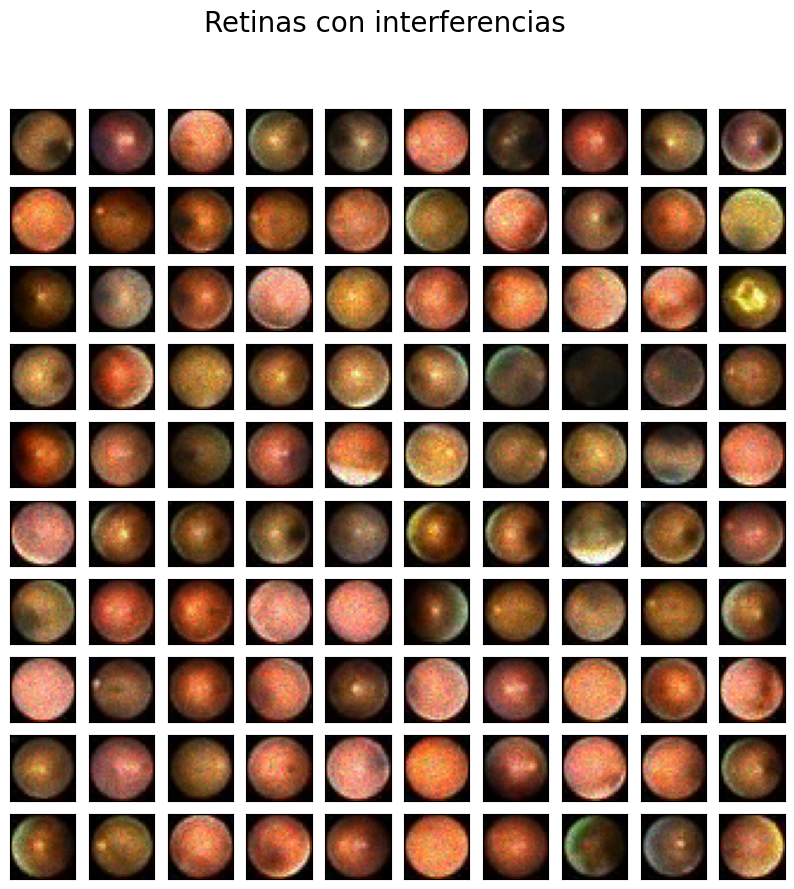

In [19]:
plt.figure(figsize=(10,10))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(noisy_train_image[i], cmap=plt.cm.binary)
plt.suptitle("Retinas con interferencias", fontsize=20)
plt.show()

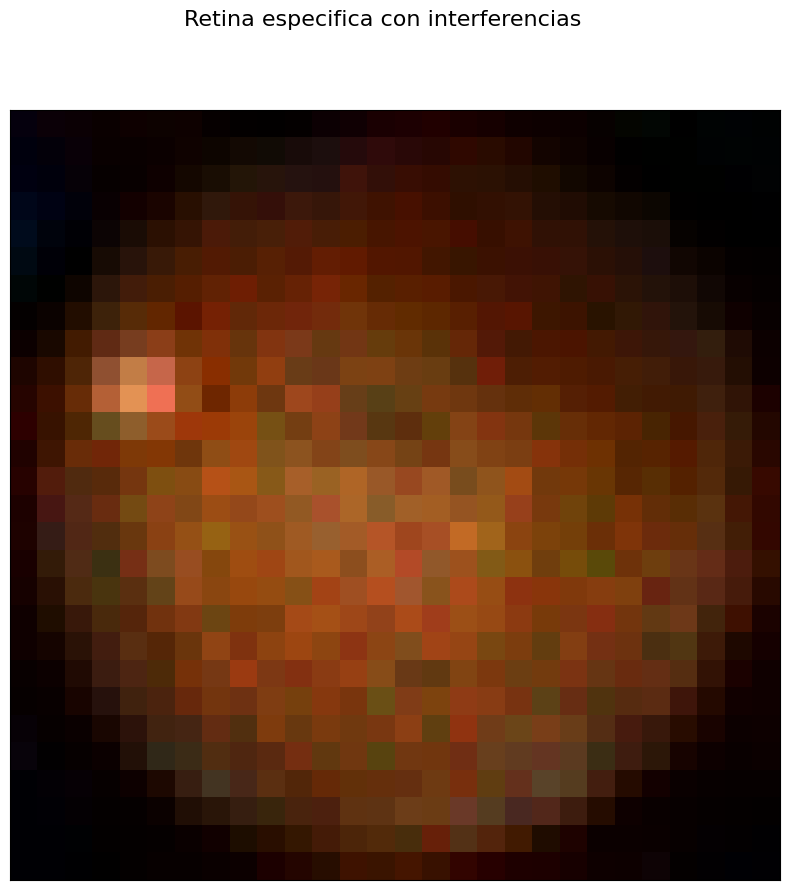

In [20]:
plt.figure(figsize=(10,10))
for i in range(1):
    plt.subplot(1,1,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(noisy_train_image[11], cmap=plt.cm.binary)
plt.suptitle("Retina especifica con interferencias", fontsize=16)
plt.show()

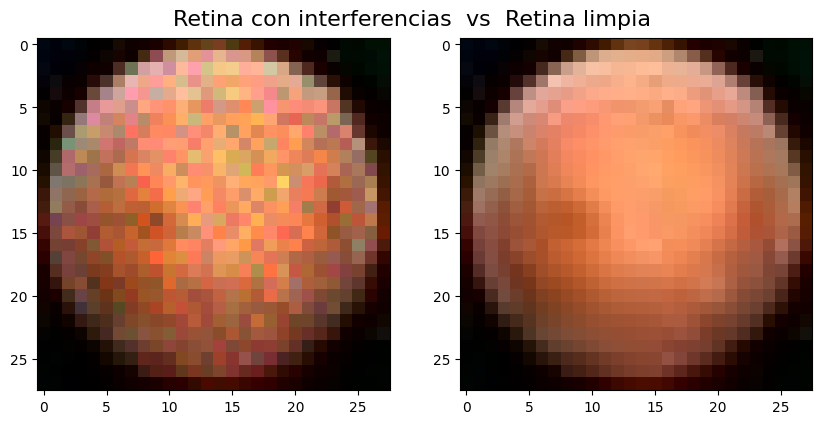

In [21]:
f = plt.figure(figsize=(10,10))
f.suptitle("Retina con interferencias  vs  Retina limpia", fontsize=16, y=0.7)

f.add_subplot(1,2,1)
plt.imshow(noisy_train_image[2].reshape(28,28,3), cmap='gray')

f.add_subplot(1,2,2)
plt.imshow(train_images[2].reshape(28,28,3), cmap='gray')

plt.show()


In [22]:
# Dimension de nuestras imágenes con ruido
print(noisy_test_image.shape)
print(noisy_train_image.shape)
print(noisy_val_image.shape)

(400, 28, 28, 3)
(1080, 28, 28, 3)
(120, 28, 28, 3)


In [23]:
#Librerias a usar para generar el denoising
from keras.layers import Dense, Input, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras import layers
from keras.models import Model

In [24]:
#Denoising model
input = layers.Input(shape=(28, 28, 3))

# Encoder
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)

# Decoder
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(3, (3, 3), activation="sigmoid", padding="same")(x)  # Cambiar a 3 filtros



In [25]:
# Autoencoder
autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_transpose (Conv2DTr  (None, 14, 14, 32)        9248  

In [26]:
autoencoder.fit(
    x=noisy_train_image,
    y=train_images,
    epochs=100,
    batch_size=140,
    shuffle=True,
    validation_data=(noisy_test_image, test_images),
)


Epoch 1/100
8/8 [==============================] - 5s 530ms/step - loss: 0.6819 - val_loss: 0.6554
Epoch 2/100
8/8 [==============================] - 3s 320ms/step - loss: 0.6393 - val_loss: 0.6192
Epoch 3/100
8/8 [==============================] - 2s 300ms/step - loss: 0.6185 - val_loss: 0.6038
Epoch 4/100
8/8 [==============================] - 2s 297ms/step - loss: 0.5996 - val_loss: 0.5761
Epoch 5/100
8/8 [==============================] - 2s 297ms/step - loss: 0.5673 - val_loss: 0.5332
Epoch 6/100
8/8 [==============================] - 3s 427ms/step - loss: 0.5189 - val_loss: 0.4790
Epoch 7/100
8/8 [==============================] - 3s 392ms/step - loss: 0.4709 - val_loss: 0.4479
Epoch 8/100
8/8 [==============================] - 2s 290ms/step - loss: 0.4496 - val_loss: 0.4393
Epoch 9/100
8/8 [==============================] - 2s 296ms/step - loss: 0.4411 - val_loss: 0.4342
Epoch 10/100
8/8 [==============================] - 2s 286ms/step - loss: 0.4358 - val_loss: 0.4304
Epoch 11/

In [27]:
#Observemos nuestras predicciones.
predictions = autoencoder.predict(noisy_test_image)
display(noisy_test_image, predictions)

13/13 [==============================] - 0s 20ms/step


array([[[[0.        , 0.05931807, 0.08107556],
         [0.        , 0.02249767, 0.05838656],
         [0.        , 0.00415623, 0.04743168],
         ...,
         [0.        , 0.00374308, 0.        ],
         [0.        , 0.02425724, 0.00791476],
         [0.01650697, 0.04349796, 0.02495783]],

        [[0.        , 0.02364167, 0.06245755],
         [0.        , 0.02061856, 0.06672797],
         [0.        , 0.02296117, 0.05914915],
         ...,
         [0.        , 0.00416515, 0.        ],
         [0.        , 0.00736118, 0.        ],
         [0.00369446, 0.02224098, 0.00859348]],

        [[0.        , 0.00844673, 0.03786339],
         [0.        , 0.03396449, 0.04385548],
         [0.02742954, 0.02312908, 0.03904501],
         ...,
         [0.01565874, 0.        , 0.        ],
         [0.00973526, 0.00611934, 0.        ],
         [0.01645945, 0.02116664, 0.        ]],

        ...,

        [[0.00744483, 0.02660614, 0.04720498],
         [0.00345478, 0.01684484, 0.03710124]

array([[[[0.04360162, 0.0360058 , 0.03936753],
         [0.02639053, 0.02322218, 0.0258381 ],
         [0.01654321, 0.01245619, 0.0129899 ],
         ...,
         [0.00529397, 0.00177955, 0.00107886],
         [0.00574203, 0.00195406, 0.00153921],
         [0.01959242, 0.00652256, 0.00531655]],

        [[0.0253286 , 0.02906917, 0.03107713],
         [0.01520673, 0.01005044, 0.01648372],
         [0.01254911, 0.00930304, 0.00928616],
         ...,
         [0.00521809, 0.00258378, 0.00258665],
         [0.00504968, 0.0032797 , 0.00275024],
         [0.01243333, 0.00265945, 0.00271356]],

        [[0.01793656, 0.01466558, 0.01633618],
         [0.01056548, 0.00779445, 0.00799301],
         [0.01532262, 0.00700858, 0.00664235],
         ...,
         [0.00895298, 0.00489735, 0.00409067],
         [0.00756943, 0.00285932, 0.00255741],
         [0.01026101, 0.00183183, 0.00064196]],

        ...,

        [[0.00961519, 0.00434084, 0.00288222],
         [0.01221997, 0.00991726, 0.01047858]


A mi parecer las predicciones no son tan claras y son poco entendibles y honestamente a nadie le gusta ver números, así que observemos mejor las predicciones con imágenes.


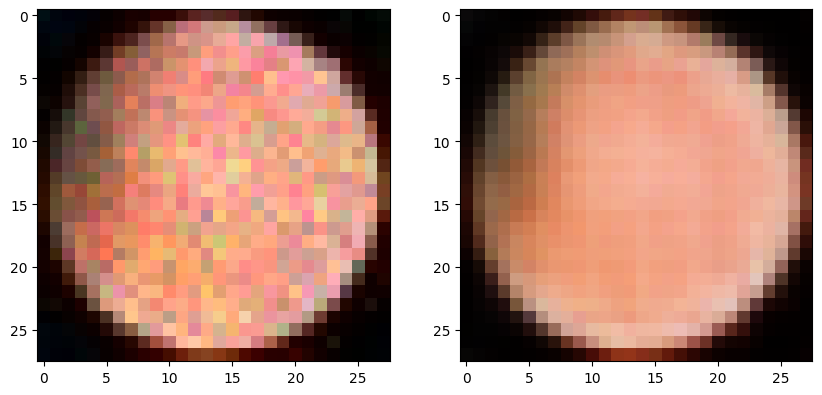

In [28]:
# Veamos como se ve una retina antes y despues de pasar por el denoising.

f = plt.figure(figsize=(10,10))

f.add_subplot(1,2,1)
plt.imshow(noisy_test_image[0].reshape(28,28,3), cmap='gray')

f.add_subplot(1,2,2)
plt.imshow(predictions[0].reshape(28,28,3), cmap='gray')

plt.show()


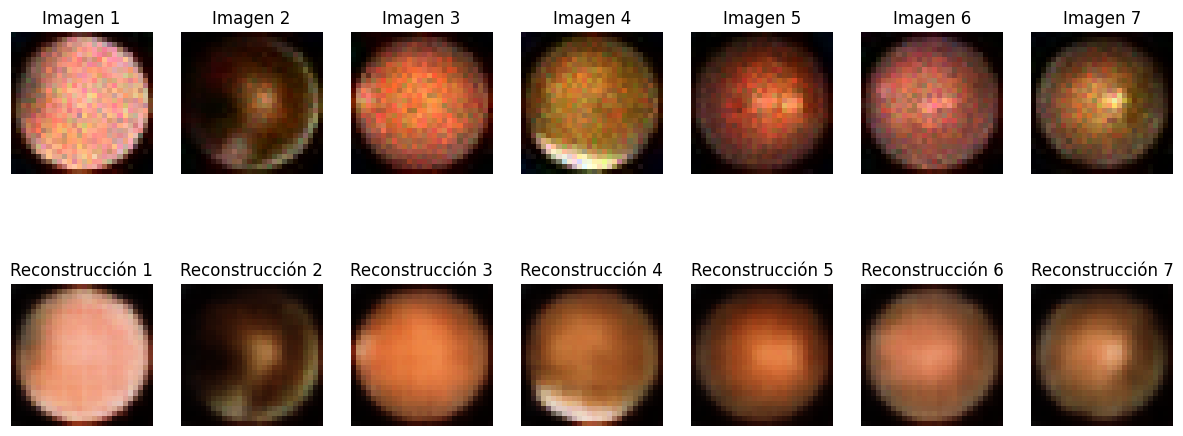

In [29]:
import matplotlib.pyplot as plt

num_images = 7

f = plt.figure(figsize=(15, 6))

for i in range(num_images):
    f.add_subplot(2, num_images, i + 1)
    plt.imshow(noisy_test_image[i].reshape(28, 28, 3), cmap='gray')
    plt.axis('off')
    plt.title('Imagen {}'.format(i + 1))

    f.add_subplot(2, num_images, i + num_images + 1)
    plt.imshow(predictions[i].reshape(28, 28, 3), cmap='gray')
    plt.axis('off')
    plt.title('Reconstrucción {}'.format(i + 1))

plt.show()


# Conclusion
Después de analizar todo el proceso, podemos llegar a varias conclusiones significativas. Primero, el ruido se generó de manera eficiente, lo que sugiere que el método de introducir interferencias en las imágenes fue efectivo y adecuado para simular las condiciones del mundo real. Segundo, el modelo de denoising que desarrollamos demostró ser altamente eficaz, como lo indica la baja función de pérdida obtenida durante el entrenamiento. Por último, al aplicar nuestro modelo a las imágenes con ruido, observamos una limpieza eficiente de las mismas, lo que demuestra la capacidad del modelo para restaurar imágenes a su estado original con precisión.

# Alcances  
En conjunto, estos resultados sugieren que nuestro modelo de denoising de imágenes de retina tiene un gran potencial en el campo de la optometría y puede ser una herramienta valiosa para mejorar la calidad de las imágenes utilizadas en el diagnóstico y tratamiento de enfermedades oculares. Sin embargo, es importante seguir investigando y validando el modelo en diferentes conjuntos de datos y condiciones para garantizar su robustez y generalización en aplicaciones clínicas.